In [1]:
# Load libraries for Data Analysis and Visualization
import os
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
from random import randrange, uniform
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score
%matplotlib inline
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [2]:
#Set working directory
os.chdir("D:\\27nov\\Edwisor\\Churn_Prediction")

In [3]:
# get current working directory
os.getcwd()

'D:\\27nov\\Edwisor\\Churn_Prediction'

In [4]:
# Load train and test data
train = pd.read_csv("Train_data.csv")
test =  pd.read_csv("Test_data.csv")

In [5]:
# First 5 observations of given train dataset
train.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
# First 5 observations of given test dataset
test.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [7]:
# Making a copy of given train and test dataset
train_0=train.copy()
test_0 =test.copy()

In [8]:
# Get column names of train data
train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [9]:
# Get column names of test data
test.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [10]:
# No of observations and variables in given train and test dataset
train.shape, test.shape

((3333, 21), (1667, 21))

In [11]:
# Getting structure of  train dataset 
type(train)
type(test)

pandas.core.frame.DataFrame

In [12]:
# Unique values in a given column
train['area code'].nunique()

3

In [13]:
# Get first 20 columns except target variable and store it in test data
test0= test.iloc[:,:20]

# Univariate Analysis

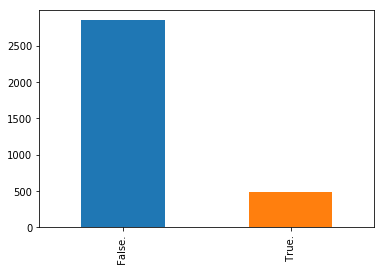

In [14]:
# For Categorical variables use frequency table or bar plots which will calculate the number of each category in a variable
train['Churn'].value_counts()
train['Churn'].value_counts().plot.bar()

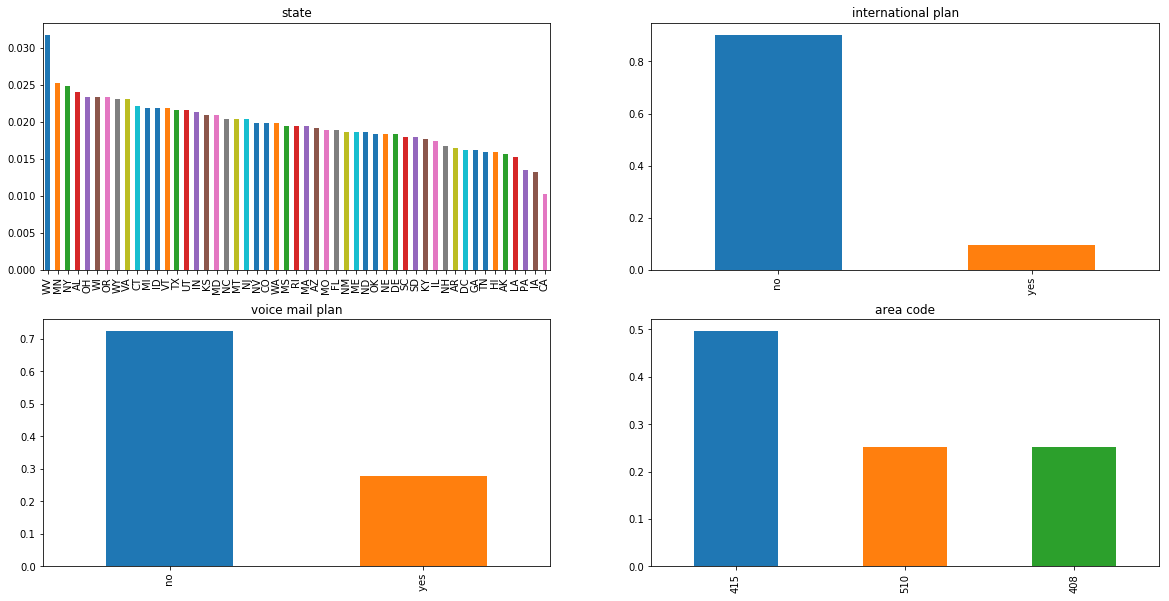

In [15]:
plt.figure(1)
plt.subplot(221)
train['state'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'state')

plt.subplot(222)
train['international plan'].value_counts(normalize=True).plot.bar(title= 'international plan')

plt.subplot(223)
train['voice mail plan'].value_counts(normalize=True).plot.bar(title= 'voice mail plan')

plt.subplot(224)
train['area code'].value_counts(normalize=True).plot.bar(title= 'area code')


plt.show()

In [16]:
# By performing Exploratory Data Analysis and Problem Description we have categorized variables into continuous and categorical
# Continuous variables
cont = ['account length','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes',
        'total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes',
       'total intl calls','total intl charge','number customer service calls']
#Categorical variables
cats = ['state','area code','phone number','international plan','voice mail plan','Churn']

C:\Users\akgkanna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


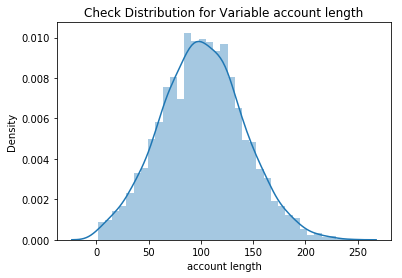

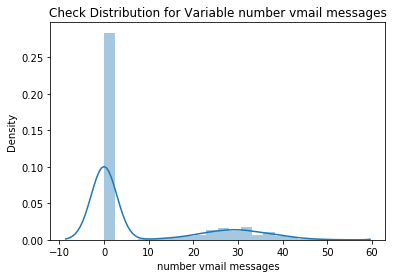

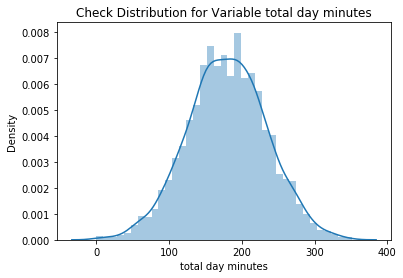

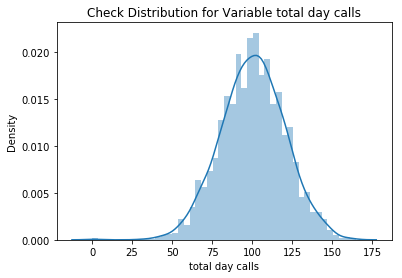

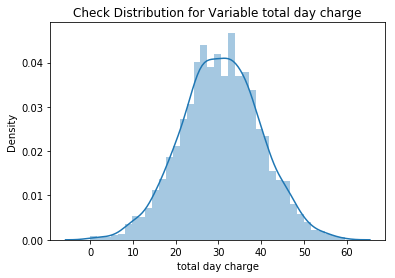

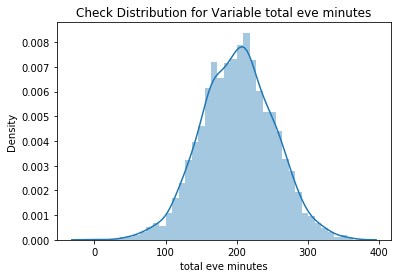

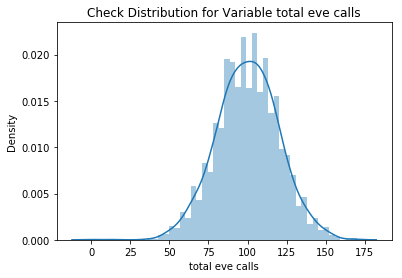

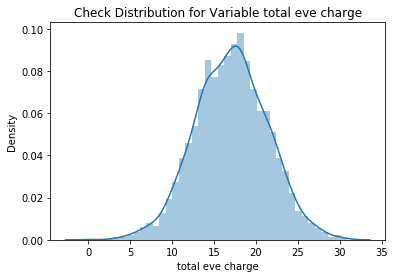

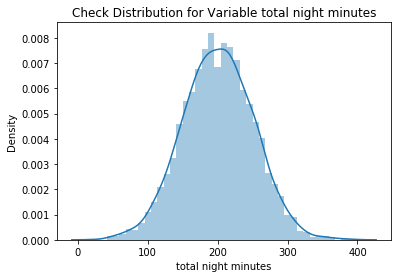

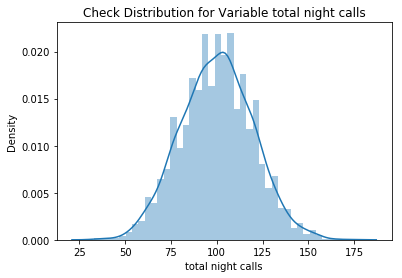

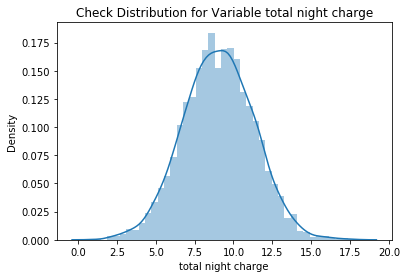

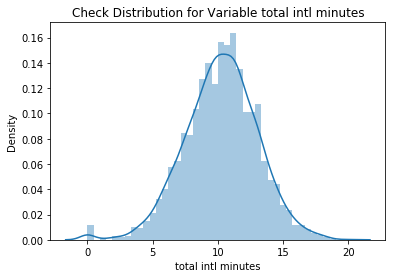

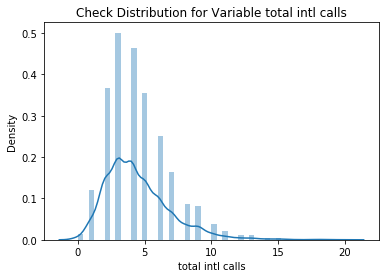

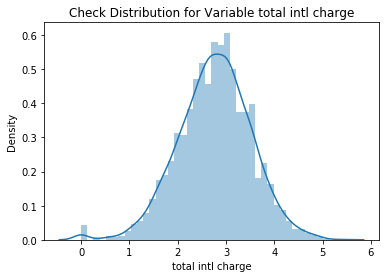

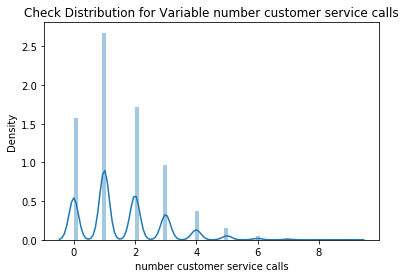

In [17]:
# Check for normally distributed variable in dataset
#For numerical features, probability density plots can be used to look at the distribution of the variable
for i in cont:
    sns.distplot(train[i],bins ='auto')
    plt.title("Check Distribution for Variable " +str(i))
    plt.ylabel("Density")
    plt.show()

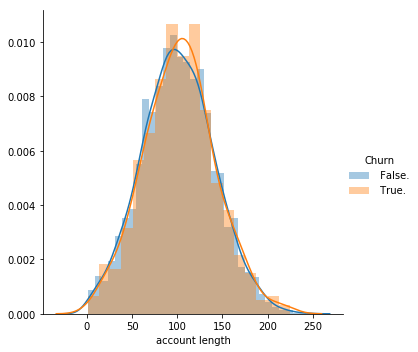

In [18]:
# Using this graph we can make classification if possible based on features 
# This graph will give more information than probability density plots (plotted above) because it also relates target variable  
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "account length") \
   .add_legend();
plt.show();


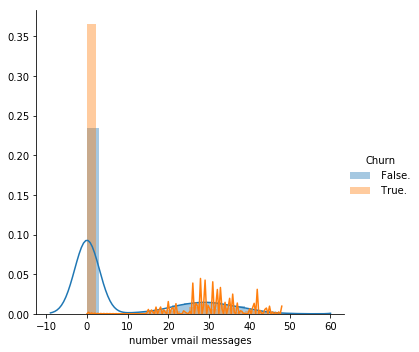

In [19]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "number vmail messages") \
   .add_legend();
plt.show();


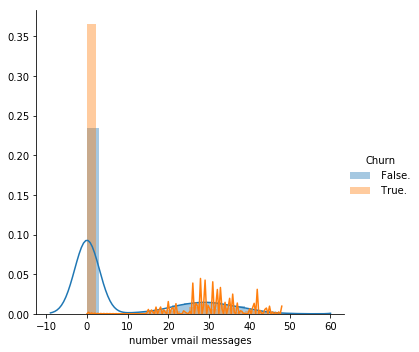

In [20]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "number vmail messages") \
   .add_legend();
plt.show();


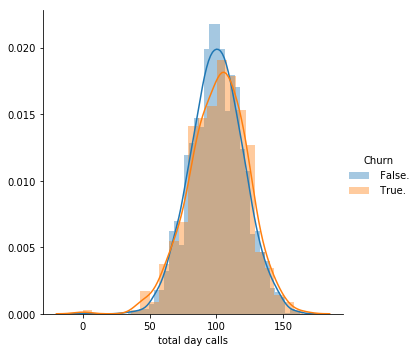

In [21]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "total day calls") \
   .add_legend();
plt.show();


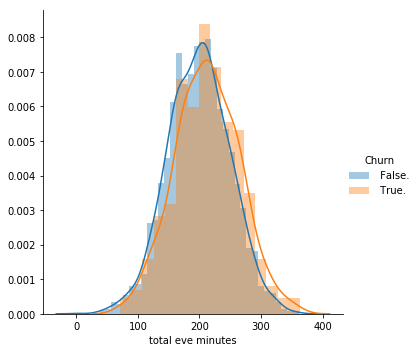

In [22]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "total eve minutes") \
   .add_legend();
plt.show();


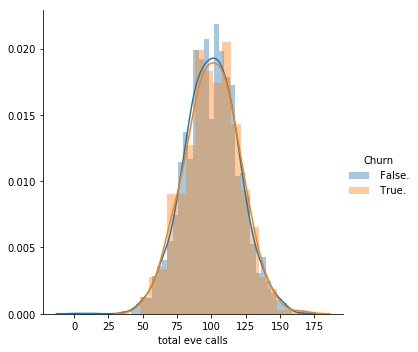

In [23]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "total eve calls") \
   .add_legend();
plt.show();


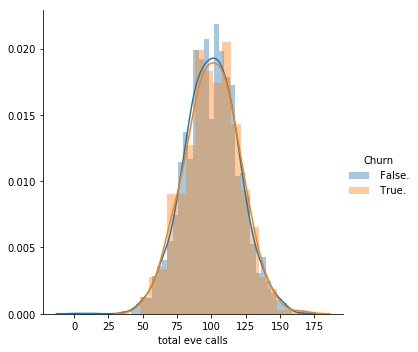

In [24]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "total eve calls") \
   .add_legend();
plt.show();


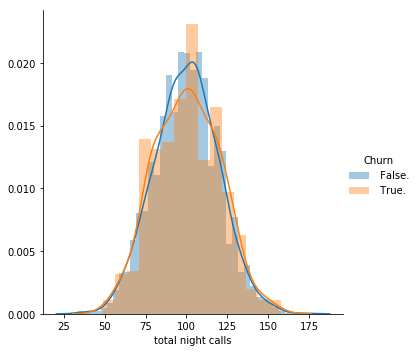

In [25]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "total night calls") \
   .add_legend();
plt.show();


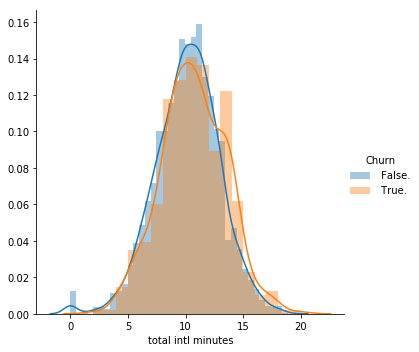

In [26]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "total intl minutes") \
   .add_legend();
plt.show();


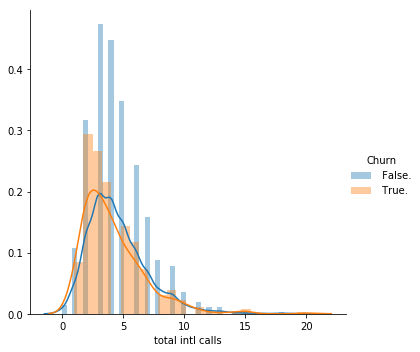

In [27]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "total intl calls") \
   .add_legend();
plt.show();


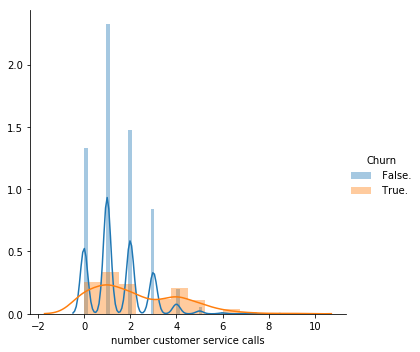

In [28]:
sns.FacetGrid(train, hue="Churn", height=5) \
   .map(sns.distplot, "number customer service calls") \
   .add_legend();
plt.show();


# Conclusion of Exploratory Data Analysis (EDA)

In [29]:
# Here we are unable to classify the churn value based on the individual feature
# If we are able to classify then we may use CDF,Violin plot etc to understand which features are useful towards classification
# Bivariate plots like Scatter plot, Pair plot to see if combination of features are useful in classification

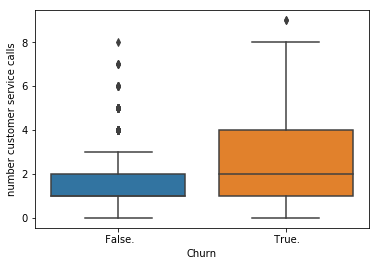

In [30]:
#Box-plot 
sns.boxplot(x='Churn',y='number customer service calls', data=train)
plt.show()

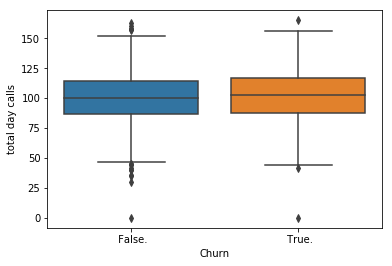

In [31]:
#Box-plot 
sns.boxplot(x='Churn',y='total day calls', data=train)
plt.show()

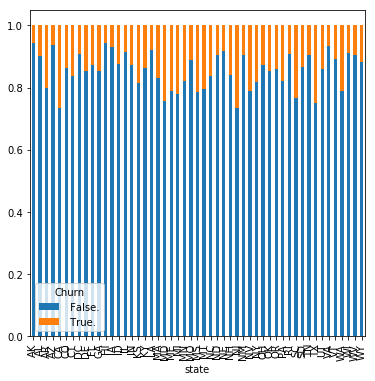

In [32]:
# Here we plotted stacked bar graph between categorical and target variable
# Due to large number of categories present in a variable, we are unable to recognize it clearly 
state=pd.crosstab(train['state'],train['Churn'])
state.div(state.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))

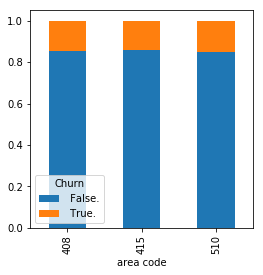

In [33]:
areacode = pd.crosstab(train['area code'],train['Churn'])
areacode.div(areacode.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

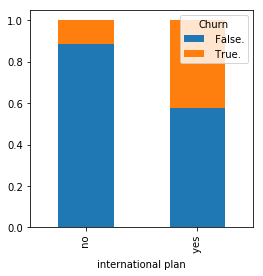

In [34]:
international_plan = pd.crosstab(train['international plan'],train['Churn'])
international_plan.div(international_plan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

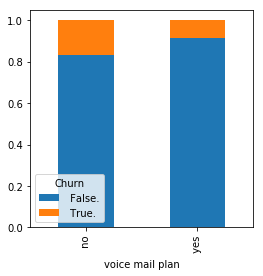

In [35]:
voice_mail_plan = pd.crosstab(train['voice mail plan'],train['Churn'])
voice_mail_plan.div(voice_mail_plan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# Missing Value Analysis

In [36]:
# Here missing values are absent
train.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [37]:
# In test set also missing values are absent
test_0.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

# Outlier Analysis

Text(0.5, 0, 'account length')

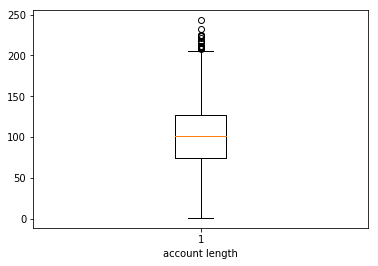

In [38]:
# With the help of Boxplot we can identify the outliers present in each variable
plt.boxplot(train['account length'])
plt.xlabel('account length')

Text(0.5, 0, 'number vmail messages')

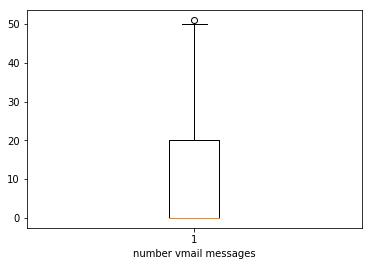

In [39]:
plt.boxplot(train['number vmail messages'])
plt.xlabel('number vmail messages')

Text(0.5, 0, 'total day minutes')

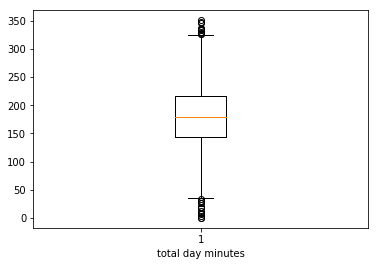

In [40]:
plt.boxplot(train['total day minutes'])
plt.xlabel('total day minutes')

Text(0.5, 0, 'total day calls')

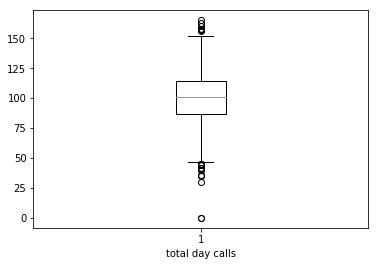

In [41]:
plt.boxplot(train['total day calls'])
plt.xlabel('total day calls')

Text(0.5, 0, 'total day charge')

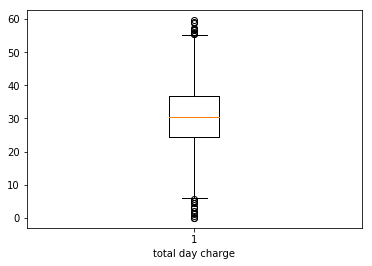

In [42]:
plt.boxplot(train['total day charge'])
plt.xlabel('total day charge')

Text(0.5, 0, 'total day charge')

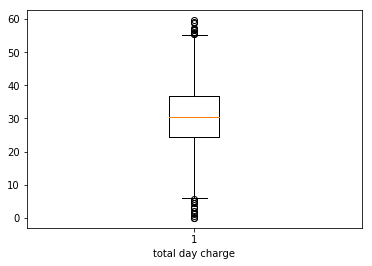

In [43]:
plt.boxplot(train['total day charge'])
plt.xlabel('total day charge')

Text(0.5, 0, 'total eve calls')

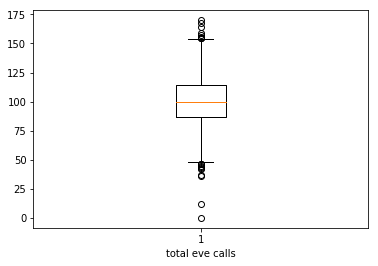

In [44]:
plt.boxplot(train['total eve calls'])
plt.xlabel('total eve calls')

Text(0.5, 0, 'total eve charge')

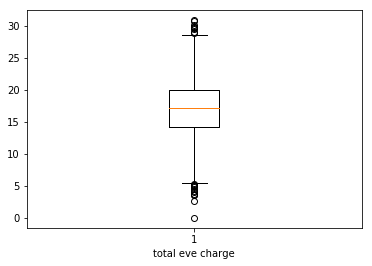

In [45]:
plt.boxplot(train['total eve charge'])
plt.xlabel('total eve charge')

Text(0.5, 0, 'total night minutes')

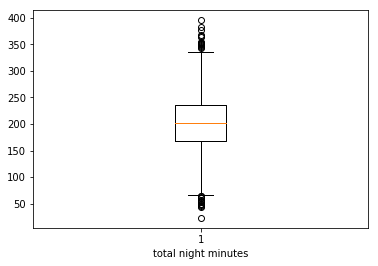

In [46]:
plt.boxplot(train['total night minutes'])
plt.xlabel('total night minutes')

Text(0.5, 0, 'total night calls')

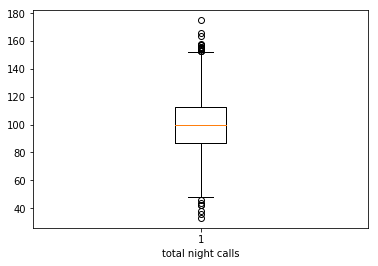

In [47]:
plt.boxplot(train['total night calls'])
plt.xlabel('total night calls')

Text(0.5, 0, 'total night calls')

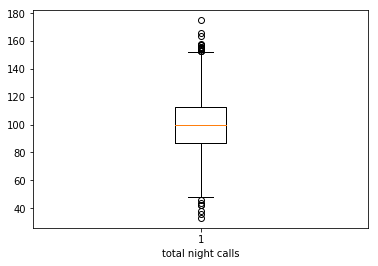

In [48]:
plt.boxplot(train['total night calls'])
plt.xlabel('total night calls')

Text(0.5, 0, 'total intl minutes')

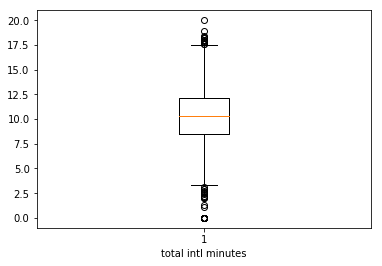

In [49]:
plt.boxplot(train['total intl minutes'])
plt.xlabel('total intl minutes')

Text(0.5, 0, 'total intl calls')

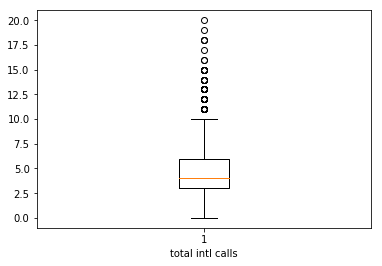

In [50]:
plt.boxplot(train['total intl calls'])
plt.xlabel('total intl calls')

Text(0.5, 0, 'total intl charge')

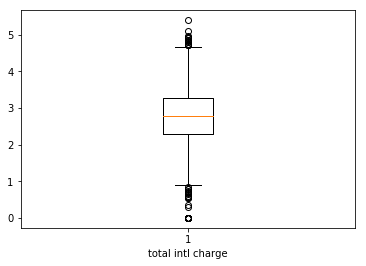

In [51]:
plt.boxplot(train['total intl charge'])
plt.xlabel('total intl charge')

Text(0.5, 0, 'number customer service calls')

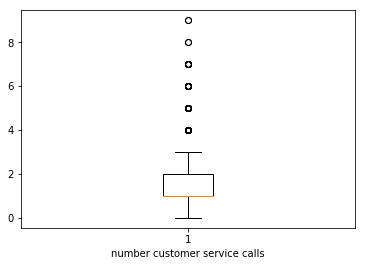

In [52]:
plt.boxplot(train['number customer service calls'])
plt.xlabel('number customer service calls')

In [53]:
#Detect and delete outliers from variables having outliers
# Here number of outliers are less than 5% of the data so we can remove these outliers 
for i in cont:
        print(i)
        # q75= 75th percentile and q25 = 25th percentile
        q75,q25 = np.percentile(train.loc[:,i], [75 ,25])
        # iqr= interquartile range
        iqr = q75 - q25 
        # minimum fence and  maximum fence
        
        minimum = q25 - (iqr*1.5)    
        maximum = q75 + (iqr*1.5)    
        print(minimum)    
        print(maximum) 
        #train_1 = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]

        train2 = train.drop(train[train.loc[:,i] < minimum].index)
        train2 = train.drop(train[train.loc[:,i] > maximum].index)
        

account length
-5.5
206.5
number vmail messages
-30.0
50.0
total day minutes
34.64999999999996
325.45000000000005
total day calls
46.5
154.5
total day charge
5.890000000000001
55.33
total eve minutes
63.54999999999997
338.35
total eve calls
46.5
154.5
total eve charge
5.4
28.759999999999998
total night minutes
64.54999999999998
337.75
total night calls
48.0
152.0
total night charge
2.914999999999999
15.195
total intl minutes
3.1000000000000005
17.5
total intl calls
-1.5
10.5
total intl charge
0.8449999999999995
4.7250000000000005
number customer service calls
-0.5
3.5


In [54]:
train2.shape

(3066, 21)

In [55]:
df_train = train2.copy()
#df_test = test.copy()

# Feature Selection

In [56]:
#Correlation analysis for continuous variables
#Correlation plot
df_train_corr = df_train.loc[:,cont]

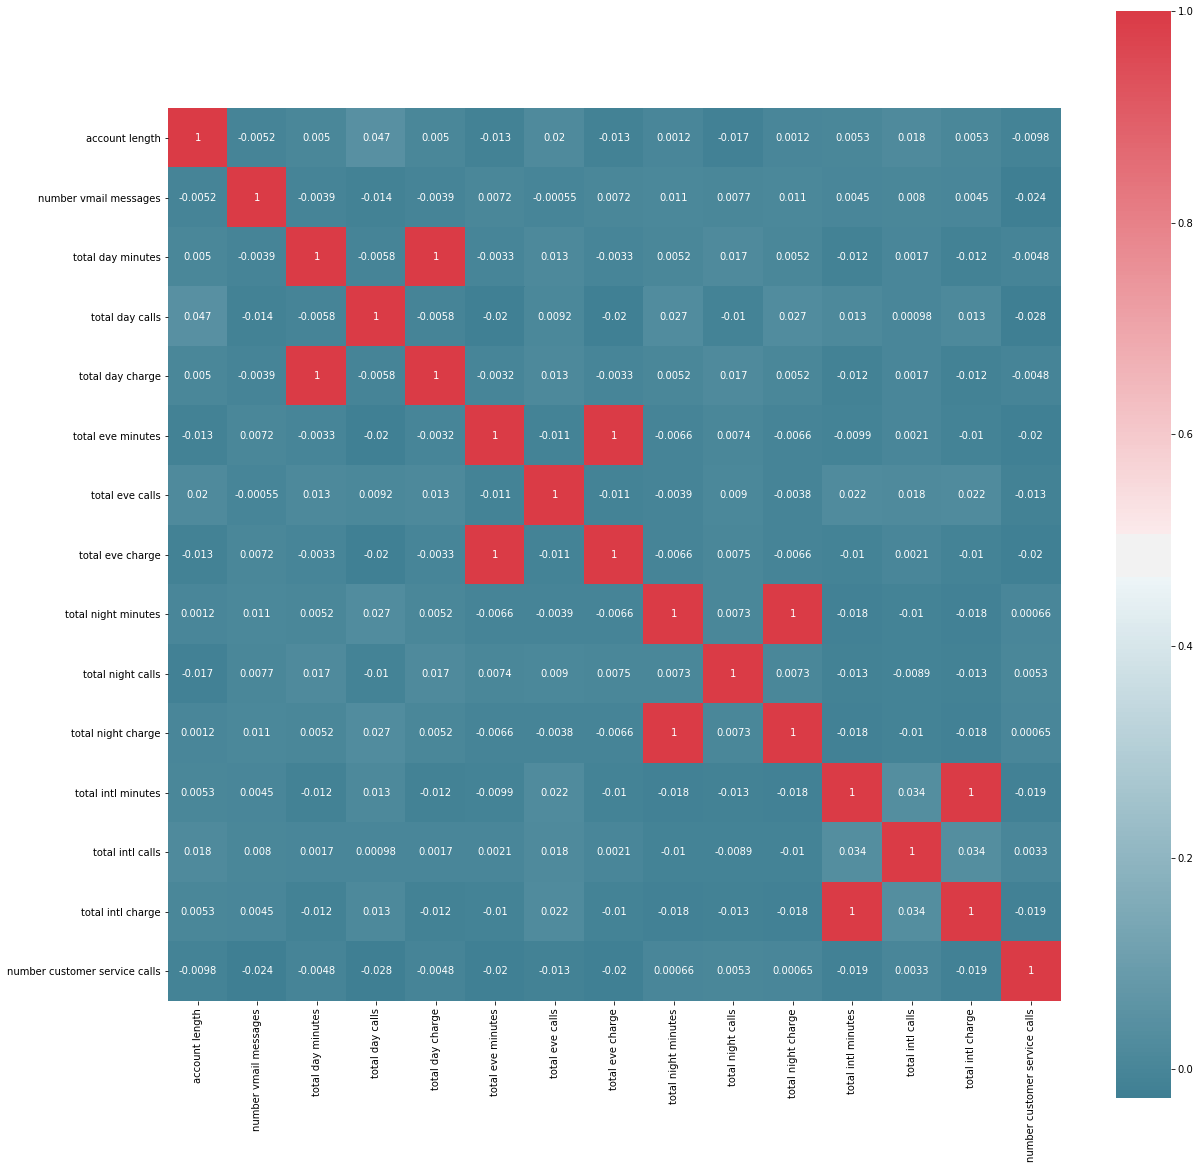

In [57]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 20))

#Generate correlation matrix
corr = df_train_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot =True)


In [58]:
#loop for chi square values to check significance level for each categorical variable
for i in cats:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_train['Churn'], df_train[i]))
    print(p)

state
0.009594705365683513
area code
0.7344072016637799
phone number
0.4915088706814553
international plan
5.260237906877538e-60
voice mail plan
8.22509244176519e-09
Churn
0.0


In [59]:
# Removing variables which are not significant
df1 = df_train.drop(['total day charge','total eve charge','total night charge','total intl charge','area code','phone number'], axis=1)

In [60]:
df_test = test.drop(['total day charge','total eve charge','total night charge','total intl charge','area code','phone number'], axis=1)

In [61]:
df_1 = df1.copy()

In [62]:
#df1.shape

In [63]:
df_test.shape

(1667, 15)

# Feature Selection

In [64]:
cont1 = ['account length','number vmail messages','total day minutes','total day calls','total eve minutes',
        'total eve calls','total night minutes','total night calls','total intl minutes',
       'total intl calls','number customer service calls']
#Categorical variables
cats1 = ['state','international plan','voice mail plan','Churn']

In [65]:
# Normalization is preferred than Standardization because data is not uniformly distributed
#Nomalisation of train data
for i in cont1:
    print(i)
    df1[i] = (df1[i] - min(df1[i]))/(max(df1[i]) - min(df1[i]))

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


In [66]:
#Nomalisation of test data
for i in cont1:
    print(i)
    df_test[i] = (df_test[i] - min(df_test[i]))/(max(df_test[i]) - min(df_test[i]))

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


In [67]:
df_1 = df1.copy()

# Model Building

In [68]:
# Get dummy variables for categorical variables
df2=pd.get_dummies(df1)
df_0 = df1.copy()
#df_test1 = pd.get_dummies(X_ts)
test1=pd.get_dummies(df_test)

In [69]:
 df1_train = df2.drop('Churn_ False.', axis=1) 

In [70]:
 df1_train.rename(columns = {'Churn_ True.':'Churn'}, inplace=True)

In [71]:
 df1_test = test1.drop('Churn_ False.', axis=1) 

In [72]:
 df1_test.rename(columns = {'Churn_ True.':'Churn'}, inplace=True)

In [73]:
df2_test = df1_test.copy()

# Logistic Regression

In [74]:
df1_train.head(5)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_ no,international plan_ yes,voice mail plan_ no,voice mail plan_ yes,Churn
0,0.524793,0.490196,0.755701,0.674847,0.545605,0.582353,0.595750,0.408451,0.500,0.15,...,0,0,0,0,0,1,0,0,1,0
1,0.438017,0.509804,0.460661,0.754601,0.540354,0.605882,0.621840,0.492958,0.685,0.15,...,0,0,0,0,0,1,0,0,1,0
2,0.561983,0.000000,0.693843,0.699387,0.334992,0.647059,0.374933,0.500000,0.610,0.25,...,0,0,0,0,0,1,0,1,0,0
3,0.342975,0.000000,0.853478,0.435583,0.171089,0.517647,0.467187,0.394366,0.330,0.35,...,0,0,0,0,0,0,1,1,0,0
4,0.305785,0.000000,0.475200,0.693252,0.409895,0.717647,0.440290,0.619718,0.505,0.15,...,0,0,0,0,0,0,1,1,0,0


In [75]:
df1_test.head(5)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_ no,international plan_ yes,voice mail plan_ no,voice mail plan_ yes,Churn
0,0.421941,0.000000,0.186431,0.706349,0.562611,0.267176,0.618449,0.429412,0.538071,0.157895,...,0,0,0,0,0,1,0,1,0,0
1,0.573840,0.000000,0.629168,0.412698,0.660237,0.770992,0.246855,0.476471,0.482234,0.368421,...,0,0,0,0,0,1,0,1,0,0
2,0.430380,0.557692,0.835315,0.484127,0.637982,0.511450,0.786950,0.747059,0.695431,0.315789,...,0,0,0,0,0,1,0,0,1,0
3,0.413502,0.000000,0.609452,0.706349,0.308902,0.381679,0.578092,0.482353,0.796954,0.105263,...,0,0,0,0,0,1,0,1,0,0
4,0.451477,0.000000,0.553204,0.349206,0.301780,0.480916,0.535901,0.629412,0.390863,0.210526,...,0,0,0,0,0,1,0,1,0,0


In [76]:
#select column indexes for independent variables
train_cols = df1_train.columns[1:66]

In [77]:
#select column indexes for independent variables
test_cols = df1_test.columns[1:66]

In [78]:
#Built Logistic Regression
logit = sm.Logit(df1_train['Churn'], df1_train[train_cols]).fit()
logit.summary()

C:\Users\akgkanna\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\akgkanna\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\akgkanna\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3066
Model:                          Logit   Df Residuals:                     3003
Method:                           MLE   Df Model:                           62
Date:                Thu, 31 Jan 2019   Pseudo R-squ.:                     inf
Time:                        00:12:21   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
number vmail messages             2.7947      1.242      2.251      0.024       0.361       5.228
total day minutes                 8.5191      0.544     15.670      0.000       7.454       9.585
total day calls                   0.4937      0.577      0.855      0.393      -0.638       1.625
total eve minutes                 5.2122      0.556      9.381      0.000       4.123       6.301
total eve calls                  -0.0529      0.627     -0.084      0.933      -1.282       1.176
total night minutes               2.6077      0.535      4.872      0.000       1.559       3.657
total night calls                 0.2064      0.518      0.398      0.691      -0.810       1.223
total intl minutes                2.7212      0.531      5.122      0.000       1.680       3.762
total intl calls                 -1.7839      0.617     -2.892      0.004      -2.993      -0.575
number customer service calls    -0.0236      0.214     -0.110      0.912      -0.444       0.396
state_AK                         -1.8790   5.84e+06  -3.22e-07      1.000   -1.14e+07    1.14e+07
state_AL                         -0.8253   5.84e+06  -1.41e-07      1.000   -1.14e+07    1.14e+07
state_AR                         -0.6552   5.84e+06  -1.12e-07      1.000   -1.14e+07    1.14e+07
state_AZ                         -0.8248   5.84e+06  -1.41e-07      1.000   -1.14e+07    1.14e+07
state_CA                          0.4126   5.84e+06   7.07e-08      1.000   -1.14e+07    1.14e+07
state_CO                         -0.0301   5.84e+06  -5.16e-09      1.000   -1.14e+07    1.14e+07
state_CT                         -0.0286   5.84e+06   -4.9e-09      1.000   -1.14e+07    1.14e+07
state_DC                         -0.3056   5.84e+06  -5.23e-08      1.000   -1.14e+07    1.14e+07
state_DE                         -0.1925   5.84e+06   -3.3e-08      1.000   -1.14e+07    1.14e+07
state_FL                         -0.4143   5.84e+06   -7.1e-08      1.000   -1.14e+07    1.14e+07
state_GA                         -0.2151   5.84e+06  -3.68e-08      1.000   -1.14e+07    1.14e+07
state_HI                         -1.3582   5.84e+06  -2.33e-07      1.000   -1.14e+07    1.14e+07
state_IA                         -1.0191   5.84e+06  -1.75e-07      1.000   -1.14e+07    1.14e+07
state_ID                          0.0726   5.84e+06   1.24e-08      1.000   -1.14e+07    1.14e+07
state_IL                         -1.5755   5.84e+06   -2.7e-07      1.000   -1.14e+07    1.14e+07
state_IN                         -0.9105   5.84e+06  -1.56e-07      1.000   -1.14e+07    1.14e+07
state_KS                          0.1856   5.84e+06   3.18e-08      1.000   -1.14e+07    1.14e+07
state_KY                         -0.2846   5.84e+06  -4.87e-08      1.000   -1.14e+07    1.14e+07
state_LA                         -0.3673   5.84e+06  -6.29e-08      1.000   -1.14e+07    1.14e+07
state_MA                          0.3006   5.84e+06   5.15e-08      1.000   -1.14e+07    1.14e+07
state_M

In [79]:
#Predict test data
df1_test['Actual_prob'] = logit.predict(df1_test[test_cols])

In [80]:
#df1_test.head(5)

In [81]:
df1_test['ActualVal'] = 1
df1_test.loc[df1_test.Actual_prob < 0.5, 'ActualVal'] = 0

In [82]:
df1_test.head(5)

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_WI,state_WV,state_WY,international plan_ no,international plan_ yes,voice mail plan_ no,voice mail plan_ yes,Churn,Actual_prob,ActualVal
0,0.421941,0.000000,0.186431,0.706349,0.562611,0.267176,0.618449,0.429412,0.538071,0.157895,...,0,0,0,1,0,1,0,0,0.001669,0
1,0.573840,0.000000,0.629168,0.412698,0.660237,0.770992,0.246855,0.476471,0.482234,0.368421,...,0,0,0,1,0,1,0,0,0.133422,0
2,0.430380,0.557692,0.835315,0.484127,0.637982,0.511450,0.786950,0.747059,0.695431,0.315789,...,0,0,0,1,0,0,1,0,0.480340,0
3,0.413502,0.000000,0.609452,0.706349,0.308902,0.381679,0.578092,0.482353,0.796954,0.105263,...,0,0,0,1,0,1,0,0,0.061702,0
4,0.451477,0.000000,0.553204,0.349206,0.301780,0.480916,0.535901,0.629412,0.390863,0.210526,...,0,0,0,1,0,1,0,0,0.035210,0


In [83]:
#Build confusion matrix
CM = pd.crosstab(df1_test['Churn'], df1_test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [84]:
#Accuracy = 88.7
#((TP+TN)*100)/(TP+TN+FP+FN)
# False Negative Rate = 71.8
(FN*100)/(FN+TP)

71.875

In [85]:
#Sensitivity or Recall = 0.28
TP/(TP+FN)

0.28125

In [86]:
df1_train.shape

(3066, 67)

# Decision Tree

In [87]:
X_train = df1_train.iloc[:, df1_train.columns!='Churn']
y_train = df1_train.Churn

In [88]:
X_test = df2_test.iloc[:, df2_test.columns!='Churn']
y_test = df2_test.Churn

In [89]:
#Decision Tree
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)


#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

In [90]:
#predict new test cases
y_pred = dt.predict(X_test)


In [91]:
#build confusion matrix
CM = confusion_matrix(y_test, y_pred)

In [92]:
CM = pd.crosstab(y_test, y_pred)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [93]:
#Accuracy = 91.3
#((TP+TN)*100)/(TP+TN+FP+FN)

(FN*100)/(FN+TP)
#False Negative Rate= FN*100/(FN+TP) = 46.43

46.42857142857143

In [94]:
#Sensitivity or Recall = 0.53
TP/(TP+FN)

0.5357142857142857

In [95]:
X = df1.drop('Churn',1)
y = df1.Churn


In [96]:
X=pd.get_dummies(X).reset_index(drop = True)
#X.head(5)
y = pd.DataFrame(y).reset_index(drop = True)


In [97]:
df = pd.concat([X, y], axis=1)
df.shape


(3066, 67)

In [98]:
X_ts = df_test.drop('Churn',1)
X_ts =pd.get_dummies(X_ts).reset_index(drop = True)

In [99]:
y_ts = df_test.Churn
y_ts = pd.DataFrame(y_ts).reset_index(drop = True)


In [100]:
df_ts = pd.concat([X_ts, y_ts], axis=1)
df_ts.shape

(1667, 67)

In [101]:
X_train1 = df.iloc[:, df.columns!='Churn']
y_train1 = df.Churn
X_test1 = df_ts.iloc[:, df_ts.columns!='Churn']
y_test1 = df_ts.Churn

In [102]:
#Decision Tree
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train1, y_train1)
#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

In [103]:
#predict new test cases
y_pred1 = dt.predict(X_test1)


In [104]:
#build confusion matrix 
CM = confusion_matrix(y_test1, y_pred1)

In [105]:
CM = pd.crosstab(y_test1, y_pred1)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [106]:
#Accuracy = 91.3
((TP+TN)*100)/(TP+TN+FP+FN)

#(FN*100)/(FN+TP)
#False Negative Rate= FN*100/(FN+TP) = 46.42

90.76184763047391

In [107]:
#Sensitivity or Recall = 0.53
TP/(TP+FN)

0.53125

# Random Forest

In [108]:
X1 = df1_train.drop('Churn',1)
y1 = df1_train.Churn


In [109]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
RF_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False).fit(X_train1, y_train1)
scores = cross_val_score(RF_model, X1, y1, cv=10, scoring='accuracy')
print(scores)

[0.9512987  0.95765472 0.95439739 0.91856678 0.95439739 0.96405229
 0.95751634 0.94117647 0.95098039 0.95751634]


In [110]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid,cv=10)


In [111]:
x_train, x_cv, y_train, y_cv = train_test_split(X1,y1, test_size =0.3, random_state=1)

In [112]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [114]:
feature_importances = pd.DataFrame(RF_model.feature_importances_,
                                   index = X_train1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [115]:
#feature_importances

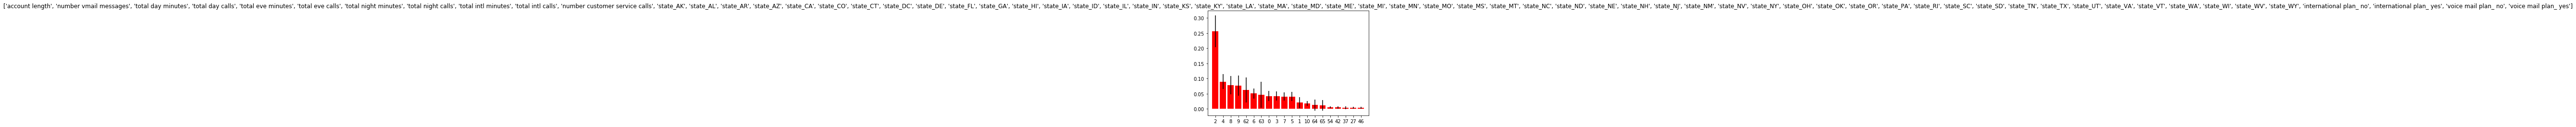

In [116]:
feature_names=['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'number customer service calls', 'state_AK',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA',
       'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH',
       'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN',
       'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'international plan_ no',
       'international plan_ yes', 'voice mail plan_ no',
       'voice mail plan_ yes']
skplt.estimators.plot_feature_importances(RF_model, feature_names)
                                          
plt.show()

In [117]:
RF_Predictions = RF_model.predict(X_test1)

In [118]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test1, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy:92 to 92.74
#FNR: 57.6 to 52.67

92.74145170965807

In [119]:
#Sensitivity or Recall = 0.45 t0 0.47
TP/(TP+FN)

0.4732142857142857

In [120]:
# Sensitivity or Recall: TP/TP+FN
# Specificity: TN/TN+FP 
# False Positive Rate: FP/FP+TN
# False Negative Rate: FN/FN+TP

# Gradient Boosting

In [121]:
clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=161,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [122]:
clf.fit(X_train1, y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=161,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [123]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(GradientBoostingClassifier(random_state=1),paramgrid,cv=5)


In [124]:
x_train, x_cv, y_train, y_cv = train_test_split(X1,y1, test_size =0.3, random_state=1)


In [125]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
# Estimating the optimized value
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=161,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [127]:
GB_Predictions = clf.predict(X_test1)
CM = confusion_matrix(y_test1, GB_Predictions)
CM = pd.crosstab(y_test1, GB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [128]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy:88.3 to 92.98
#FNR: 67.4 to 45.1

92.98140371925615

In [129]:
#Sensitivity or Recall = 0.32 to 0.54
TP/(TP+FN)

0.5491071428571429

# XGBoost

In [130]:
XGB = XGBClassifier()
XGB.fit(X_train1,y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [131]:
#predict test cases
y_pred1 = XGB.predict(X_test1)

In [132]:
CM = confusion_matrix(y_test1, y_pred1)
CM = pd.crosstab(y_test1, y_pred1)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [133]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy:93.5
#FNR: 46.8

93.52129574085183

In [134]:
#Sensitivity or Recall = 0.53
TP/(TP+FN)

0.53125

# K Nearest Neighbors

In [135]:
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train1, y_train1)

In [136]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [137]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 86.86 
#FNR: 94.2

86.8626274745051

# Naive Bayes

In [138]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train1, y_train1)

In [139]:
#predict test cases
NB_Predictions = NB_model.predict(X_test1)

In [140]:
#Build confusion matrix
CM = pd.crosstab(y_test1, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 60
#FNR: 46

45.982142857142854